## 1. Introduction
<p>Everyone loves Lego (unless you ever stepped on one). Did you know by the way that "Lego" was derived from the Danish phrase leg godt, which means "play well"? Unless you speak Danish, probably not. </p>
<p>In this project, we will analyze a fascinating dataset on every single lego block that has ever been built!</p>
<p><img src="https://s3.amazonaws.com/assets.datacamp.com/production/project_10/datasets/lego-bricks.jpeg" alt="lego"></p>

In [82]:
# Nothing to do here

## 2. Reading Data
<p>A comprehensive database of lego blocks is provided by <a href="https://rebrickable.com/downloads/">Rebrickable</a>. The data is available as csv files and the schema is shown below.</p>
<p><img src="https://s3.amazonaws.com/assets.datacamp.com/production/project_10/datasets/downloads_schema.png" alt="schema"></p>
<p>Let us start by reading in the colors data to get a sense of the diversity of lego sets!</p>

In [84]:
# Import modules
import pandas as pd

# Read colors data
colors = pd.read_csv('datasets/colors.csv')

# Print the first few rows
colors.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


## 3. Exploring Colors
<p>Now that we have read the <code>colors</code> data, we can start exploring it! Let us start by understanding the number of colors available.</p>

In [86]:
# How many distinct colors are available?
num_colors = colors['name'].nunique()
print(num_colors)

135


## 4. Transparent Colors in Lego Sets
<p>The <code>colors</code> data has a column named <code>is_trans</code> that indicates whether a color is transparent or not. It would be interesting to explore the distribution of transparent vs. non-transparent colors.</p>

In [88]:
# colors_summary: Distribution of colors based on transparency
colors_summary = colors.groupby('is_trans').count()
print(colors_summary)

           id  name  rgb
is_trans                
f         107   107  107
t          28    28   28


## 5. Explore Lego Sets
<p>Another interesting dataset available in this database is the <code>sets</code> data. It contains a comprehensive list of sets over the years and the number of parts that each of these sets contained. </p>
<p><img src="https://imgur.com/1k4PoXs.png" alt="sets_data"></p>
<p>Let us use this data to explore how the average number of parts in Lego sets has varied over the years.</p>

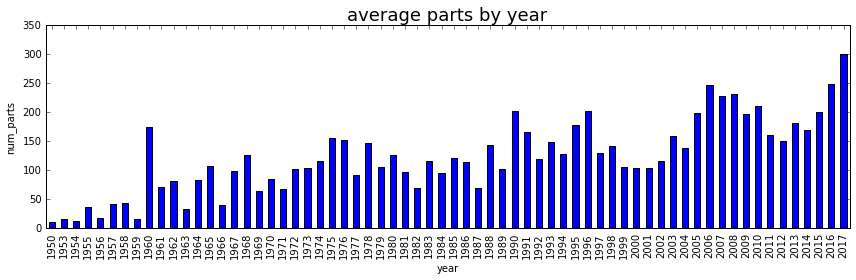

In [90]:
import matplotlib.pyplot as plt
%matplotlib inline
# Read sets data as `sets`
sets = pd.read_csv('datasets/sets.csv')
# Create a summary of average number of parts by year: `parts_by_year`
parts_by_year = (sets.groupby('year').sum()/sets.groupby('year').count()).loc[:,'num_parts']
# Plot trends in average number of parts by year
fig, axes = plt.subplots(figsize=(12,4))
parts_by_year.plot(kind='bar', ax=axes)
axes.set_title('average parts by year', fontsize=18)
axes.set_ylabel('num_parts')

## 6. Lego Themes Over Years
<p>Lego blocks ship under multiple <a href="https://shop.lego.com/en-US/Themes">themes</a>. Let us try to get a sense of how the number of themes shipped has varied over the years.</p>

In [92]:
themes_by_year = sets[['year', 'theme_id']].groupby('year', as_index=False).agg({'theme_id': pd.Series.count})
print(themes_by_year)

    year  theme_id
0   1950         7
1   1953         4
2   1954        14
3   1955        28
4   1956        12
5   1957        21
6   1958        42
7   1959         4
8   1960         3
9   1961        17
10  1962        40
11  1963        18
12  1964        11
13  1965        10
14  1966        89
15  1967        21
16  1968        25
17  1969        69
18  1970        29
19  1971        45
20  1972        38
21  1973        68
22  1974        39
23  1975        31
24  1976        68
25  1977        92
26  1978        73
27  1979        82
28  1980        88
29  1981        79
..   ...       ...
36  1988        68
37  1989       114
38  1990        85
39  1991       106
40  1992       115
41  1993       111
42  1994       128
43  1995       128
44  1996       144
45  1997       194
46  1998       325
47  1999       300
48  2000       327
49  2001       339
50  2002       447
51  2003       415
52  2004       371
53  2005       330
54  2006       283
55  2007       319
56  2008    

## 7. Wrapping It All Up!
<p>Lego blocks offer an unlimited amount of fun across ages. We explored some interesting trends around colors, parts, and themes. </p>